# Préparation des données pour construire un modèle

Lino Galiana  
2025-10-06

<div class="badge-container"><div class="badge-text">Pour essayer les exemples présents dans ce tutoriel :</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/modelisation/0_preprocessing.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«0_preprocessing»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«modelisation%200_preprocessing%20correction»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«0_preprocessing»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«modelisation%200_preprocessing%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//blob/main//notebooks/modelisation/0_preprocessing.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

> **Compétences à l’issue de ce chapitre**
>
> -   Comprendre l’importance cruciale du preprocessing pour garantir la cohérence entre les données et les hypothèses de modélisation, en s’appuyant sur l’écosystème robuste de Scikit-Learn ;
> -   Explorer la structure des données à l’aide de Pandas pour sélectionner les variables pertinentes avant modélisation ;
> -   Transformer les données continues selon les besoins du modèle : standardisation (distribution centrée-réduite) ou normalisation (norme unité), selon le contexte de l’algorithme ;
> -   Encoder les variables catégorielles via LabelEncoder, OrdinalEncoder ou OneHotEncoder pour les rendre utilisables en modélisation ;
> -   Gérer les valeurs manquantes grâce à l’imputation (moyenne, médiane, mode ou méthodes plus sophistiquées), au lieu de supprimer systématiquement les observations ;
> -   Détecter et traiter les valeurs aberrantes (outliers), en les identifiant via leur distribution, puis en les retirant si elles nuisent à la qualité du modèle ;
> -   Comprendre que, du point de vue de l’implémentation en Scikit, le preprocessing constitue un apprentissage : les paramètres estimés (moyenne, variance) sur l’ensemble d’entraînement peuvent être ré-appliqués à tout nouveau jeu de données, assurant que la distribution des données post-processing coïncide avec celle des données d’apprentissage.

# 1. Introduction

L’[introduction de cette partie](../../content/modelisation/index.qmd) présentait les enjeux de l’adoption d’une approche algorithmique plutôt que statistique pour modéliser des processus empiriques. L’objectif de ce chapitre est d’introduire à la méthodologie du *machine learning*, aux choix qu’impliquent une approche algorithmique sur la structuration du travail sur les données. Ce sera également l’occasion de présenter l’écosystème du *machine learning* en `Python` et notamment la librairie centrale dans celui-ci: [`Scikit Learn`](https://scikit-learn.org/stable/).

L’objectif de ce chapitre est de présenter quelques éléments de
préparation des données. Il s’agit d’une étape fondamentale, à ne
pas négliger. Les modèles reposent sur certaines hypothèses, généralement
relatives à la distribution théorique des variables, qui y sont intégrées.

Il est nécessaire de faire correspondre la distribution empirique
à ces hypothèses, ce qui implique un travail de restructuration des données.
Celui-ci permettra d’avoir des résultats de modélisation plus pertinents.
Nous verrons dans le chapitre sur les *pipelines* comment industrialiser
ces étapes de *preprocessing* afin de se simplifier la vie pour appliquer
un modèle sur un jeu de données différent de celui sur lequel il a été estimé.

Ce chapitre, comme l’ensemble de la partie *machine learning*, est une introduction pratique illustrée dans une perspective de prédiction électorale. En l’occurrence, il s’agit de prédire les résultats des élections américaines de 2020 au niveau comté à partir de variables socio-démographiques. L’idée sous-jacente est qu’il existe des facteurs sociologiques, économiques ou démographiques influençant le vote mais dont on ne connaît pas bien les motifs ou les interactions complexes entre plusieurs facteurs.

## 1.1 Présentation de l’écosystème `Scikit`

`Scikit Learn` est aujourd’hui la librairie de référence dans l’écosystème du
*Machine Learning*. Il s’agit d’une librairie qui, malgré les très nombreuses
méthodes implémentées, présente l’avantage d’être un point d’entrée unifié.
Cet aspect unifié est l’une des raisons du succès précoce de celle-ci. `R` n’a
bénéficié que plus récemment d’une librairie unifiée,
à savoir [`tidymodels`](https://www.tidymodels.org/).

Une autre raison du succès de `Scikit` est son approche opérationnelle : la mise
en production de modèles développés via les *pipelines* `Scikit` est peu coûteuse.
Un [chapitre spécial de ce cours](../../pipeline-scikit) est dédié aux *pipelines*.
Avec Romain Avouac, nous proposons un [cours plus avancé](https://ensae-reproductibilite.github.io/website/)
en dernière année d’ENSAE où nous présentons certains enjeux relatifs
à la mise en production de modèles développés avec `Scikit`.

Le guide utilisateur de `Scikit` est une référence précieuse,
à consulter régulièrement. La partie sur le *preprocessing*, objet de ce chapitre, est
disponible [ici](https://scikit-learn.org/stable/modules/preprocessing.html).

> **`Scikit Learn`, un succès français ! 🐓🥖🥐**
>
> `Scikit Learn` est une librairie *open source* issue des travaux de l’[Inria](https://www.inria.fr/fr) 🇫🇷. Depuis plus de 10 ans, cette institution publique française développe et maintient ce *package* téléchargé 2 millions de fois par jour. En 2023, pour sécuriser la maintenance de ce *package*, une *start up* nommée [`Probabl.ai`](https://probabl.ai/) a été créée autour de l’équipe des développeurs.euses de `Scikit`.
>
> Pour découvrir la richesse de l’écosystème `Scikit`, il
> est recommandé de suivre le
> [`MOOC scikit`](https://www.fun-mooc.fr/fr/cours/machine-learning-python-scikit-learn/),
> développé dans le cadre de l’initiative [`Inria Academy`](https://www.inria.fr/fr/mooc-scikit-learn).

## 1.2 Préparation des données

L’exercice 1 permet, à ceux qui le désirent, d’essayer de le reconstituer pas à pas.

Les *packages* suivants sont nécessaires pour importer et visualiser
les données d’élection :

In [ ]:
!pip install --upgrade xlrd
!pip install geopandas

Les sources de données étant diverses, le code qui construit la base finale est directement fourni.
Le travail de construction d’une base unique
est un peu fastidieux mais il s’agit d’un bon exercice, que vous pouvez tenter,
pour [réviser `Pandas`](../../content/manipulation/02a_pandas_tutorial.qmd):

> **Exercice 1 (optionnel): construire la base de données**
>
> **Cet exercice est OPTIONNEL**
>
> 1.  Télécharger et importer le shapefile [depuis ce lien](https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_02_sldl_500k.zip)
> 2.  Exclure les Etats suivants : “02”, “69”, “66”, “78”, “60”, “72”, “15”
> 3.  Importer les résultats des élections depuis [ce lien](https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv)
> 4.  Importer les bases disponibles sur le site de l’USDA en faisant attention à renommer les variables de code FIPS de manière identique
>     dans les 4 bases
> 5.  *Merger* ces 4 bases dans une base unique de caractéristiques socioéconomiques
> 6.  *Merger* aux données électorales à partir du code FIPS
> 7.  *Merger* au shapefile à partir du code FIPS. Faire attention aux 0 à gauche dans certains codes. Il est
>     recommandé d’utiliser la méthode `str.lstrip` pour les retirer
> 8.  Importer les données des élections 2000 à 2016 à partir du [MIT Election Lab](https://electionlab.mit.edu/data)?
>     Les données peuvent être directement requêtées depuis l’url
>     <https://dataverse.harvard.edu/api/access/datafile/3641280?gbrecs=false>
> 9.  Créer une variable `share` comptabilisant la part des votes pour chaque candidat.
>     Ne garder que les colonnes `"year", "FIPS", "party", "candidatevotes", "share"`
> 10. Faire une conversion `long` to `wide` avec la méthode `pivot_table` pour garder une ligne
>     par comté x année avec en colonnes les résultats de chaque candidat dans cet état.
> 11. Merger à partir du code FIPS au reste de la base.

Si vous ne faites pas l’exercice 1, pensez à charger les données en executant la fonction `get_data.py` :

In [ ]:
import requests

url = 'https://raw.githubusercontent.com/linogaliana/python-datascientist/main/content/modelisation/get_data.py'
r = requests.get(url, allow_redirects=True)
open('getdata.py', 'wb').write(r.content)

import getdata
votes = getdata.create_votes_dataframes()

Néanmoins, avant de se concentrer sur la préparation des données, nous
allons passer un peu de temps à explorer la structure des données
à partir de laquelle nous désirons construire une modélisation. Ceci
est indispensable afin de comprendre la nature de celles-ci et choisir
une modélisation adéquate.

Ce code introduit une base nommée `votes` dans l’environnement. Il s’agit d’une base rassemblant les différentes sources. Elle a l’aspect
suivant :

In [ ]:
votes.loc[:, votes.columns != "geometry"].head(3)

3 rows × 305 columns

La carte choroplèthe suivante permet de visualiser rapidement les résultats
(l’Alaska et Hawaï ont été exclus).

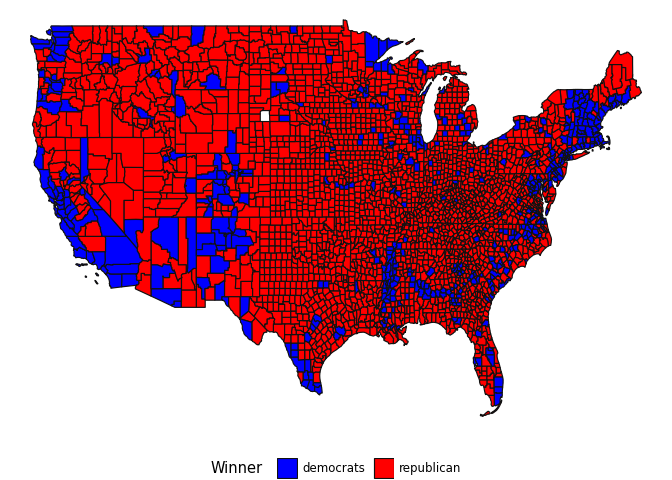

In [ ]:
from plotnine import *

# republican : red, democrat : blue
color_dict = {'republican': '#FF0000', 'democrats': '#0000FF'}

(
  ggplot(votes) +
  geom_map(aes(fill = "winner")) +
  scale_fill_manual(color_dict) +
  labs(fill = "Winner") +
  theme_void() +
  theme(legend_position = "bottom")
)

> **Le piège territorial**
>
> Comme cela a été évoqué dans le [chapitre consacré à la cartographie](../../content/visualisation/matplotlib.qmd), les cartes choroplèthes peuvent donner une impression fallacieuse
> que le parti Républicain a gagné largement en 2020 car ce type de représentation graphique donne plus d’importance aux grands espaces plutôt qu’aux espaces denses. Ceci explique que ce type de carte ait pu servir
> de justification pour contester les résultats du vote.
>
> Il existe des représentations à
> privilégier pour ce type de phénomènes où la densité est importante. L’une des représentations à privilégier est les
> ronds proportionnels (voir Insee (2018), *“Le piège territorial en cartographie”*). Les cercles proportionnels permettent ainsi à l’oeil de se concentrer sur les
> zones les plus denses et non sur les grands espaces. Cette fois, on voit bien
> que le vote démocrate est majoritaire, ce que cachait l’aplat de couleur.
>
> Le [GIF “Land does not vote, people do”](https://www.core77.com/posts/90771/A-Great-Example-of-Better-Data-Visualization-This-Voting-Map-GIF), qui avait eu un certain succès en 2020, propose un autre mode de visualisation.
> La carte originale a été construite avec `JavaScript`. Cependant,
> on dispose avec `Python` de plusieurs outils
> pour répliquer, à faible coût, cette carte
> grâce à
> l’une des surcouches à `JavaScript` vues dans la partie [visualisation](../../content/visualisation/index.qmd).

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly
import plotly.graph_objects as go


centroids = votes.copy()
centroids.geometry = centroids.centroid
centroids['size'] = centroids['CENSUS_2020_POP'] / 10000  # to get reasonable plotable number

color_dict = {"republican": '#FF0000', 'democrats': '#0000FF'}
centroids["winner"] =  np.where(centroids['votes_gop'] > centroids['votes_dem'], 'republican', 'democrats') 


centroids['lon'] = centroids['geometry'].x
centroids['lat'] = centroids['geometry'].y
centroids = pd.DataFrame(centroids[["county_name",'lon','lat','winner', 'CENSUS_2020_POP',"state_name"]])
groups = centroids.groupby('winner')

df = centroids.copy()

df['color'] = df['winner'].replace(color_dict)
df['size'] = df['CENSUS_2020_POP']/6000
df['text'] = df['CENSUS_2020_POP'].astype(int).apply(lambda x: '<br>Population: {:,} people'.format(x))
df['hover'] = df['county_name'].astype(str) +  df['state_name'].apply(lambda x: ' ({}) '.format(x)) + df['text']

fig_plotly = go.Figure(
  data=go.Scattergeo(
  locationmode = 'USA-states',
  lon=df["lon"], lat=df["lat"],
  text = df["hover"],
  mode = 'markers',
  marker_color = df["color"],
  marker_size = df['size'],
  hoverinfo="text"
  )
)

fig_plotly.update_traces(
  marker = {'opacity': 0.5, 'line_color': 'rgb(40,40,40)', 'line_width': 0.5, 'sizemode': 'area'}
)

fig_plotly.update_layout(
  title_text = "Reproduction of the \"Acres don't vote, people do\" map <br>(Click legend to toggle traces)",
  showlegend = True,
  geo = {"scope": 'usa', "landcolor": 'rgb(217, 217, 217)'}
)

fig_plotly.show()

/tmp/ipykernel_7526/4224057530.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


# 2. La démarche générale

Dans ce chapitre, nous allons nous focaliser sur la préparation
des données à faire en amont du travail de modélisation.
Cette étape est indispensable pour s’assurer de la cohérence
entre les données et les hypothèses de modélisation mais aussi
pour produire des analyses valides scientifiquement.

La démarche générale que nous adopterons dans ce chapitre, et qui sera ensuite raffinée dans les prochains chapitres, est la suivante :

<figure id="fig-ml-pipeline">
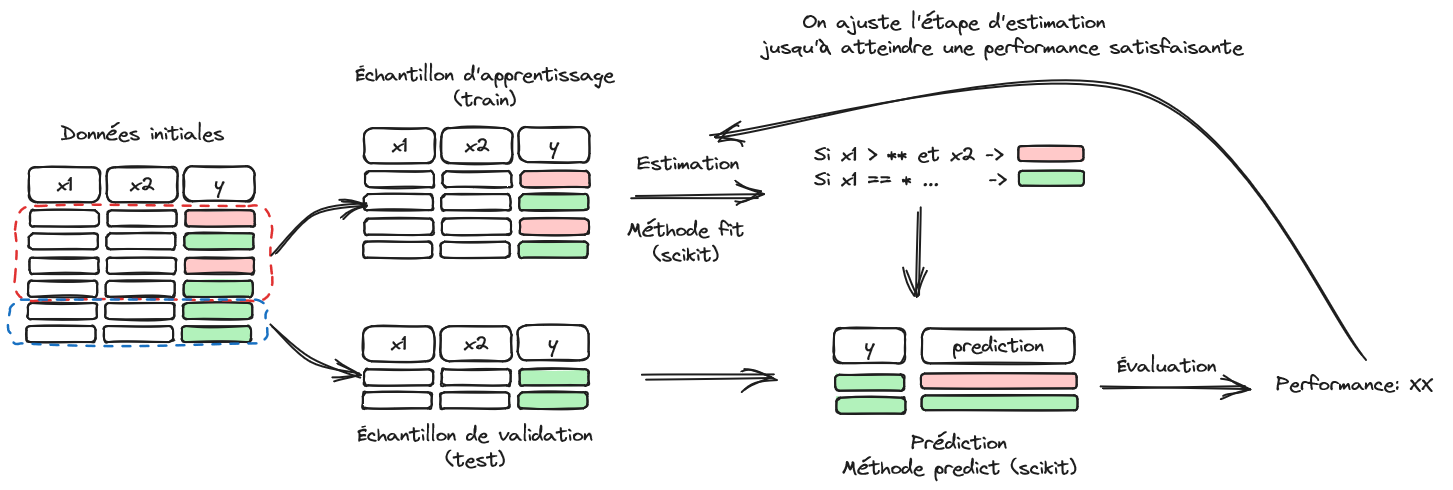
<figcaption>Figure 2.1: Illustraton de la méthodologie du <em>machine learning</em></figcaption>
</figure>

La <a href="#fig-ml-pipeline" class="quarto-xref">Figure 2.1</a> illustre la structuration d’un problème de *machine learning*.

Tout d’abord, on découpe l’ensemble des données disponibles en deux parties, **échantillons d’apprentissage** et de **validation**. Le premier sert à entraîner un modèle et la qualité des prédictions de celui-ci est
évaluée sur le deuxième pour limiter
le biais de surapprentissage. Le chapitre suivant approfondira
cette question de l’évaluation des modèles. A ce stade de notre
progression, on se concentrera dans ce chapitre
sur la question des données.

La librairie `Scikit` est particulièrement pratique parce qu’elle propose énormément d’algorithmes de *machine learning* avec quelques points d’entrée unifiée, notamment les méthodes `fit` et `predict`. Néanmoins, l’unification va au-delà de l’entraînement d’algorithmes. Toutes les étapes de préparation de données qui sont intégrées dans `Scikit` proposent ces deux mêmes points d’entrée. Autrement dit, les préparations de données sont construites comme une estimation de paramètres qui peut être réappliquée sur un autre jeu de données. Par exemple, cette préparation de données peut être une estimation de moyenne et variance pour normaliser des variables. La moyenne et la variance seront évaluées sur l’échantillon d’apprentissage et les mêmes moyennes et variances pourront être réappliquées sur un autre jeu de données pour le normaliser de la même façon.

# 3. Explorer la structure des données

La première étape nécessaire à suivre avant de se lancer dans la modélisation
est de déterminer les variables à inclure dans le modèle.

Les fonctionnalités de `Pandas` sont, à ce niveau, suffisantes pour explorer des structures simples.
Néanmoins, lorsqu’on est face à un jeu de données présentant de
nombreuses variables explicatives (*features* en machine learning, *covariates* en économétrie),
il est souvent judicieux d’avoir une première étape de sélection de variables,
ce que nous verrons par la suite dans la [partie dédiée](../../content/modelisation/4_featureselection.qmd).

Avant d’être en mesure de sélectionner le meilleur ensemble de variables explicatives,
nous allons en prendre un nombre restreint et arbitraire.
La première tâche est de représenter les relations entre les données,
notamment la relation des variables explicatives
à la variable dépendante (le score du parti républicain)
ainsi que les relations entre les variables explicatives.

Pour le prochain exercice, afin d’illustrer le principe de l’inspection visuelle des corrélations, nous n’allons garder qu’un nombre limité de variables, choisies de manière quelle que peu arbitraire.

In [ ]:
df2 = votes.set_index("GEOID").loc[
    : ,
    [
        "winner", "votes_gop",
        'Unemployment_rate_2019', 'Median_Household_Income_2021',
        'Percent of adults with less than a high school diploma, 2018-22',
        "Percent of adults with a bachelor's degree or higher, 2018-22"
    ]
]
df2 = df2.dropna()

> **Exercice 2 (optionnel) : Regarder les corrélations entre les variables**
>
> **Cet exercice est OPTIONNEL**
>
> Représenter grâce à un graphique la matrice de corrélation. Vous pouvez utiliser le *package* `seaborn` et sa fonction `heatmap`.

La matrice de corrélation peut être construite de plusieurs manières, en fonction du *framework* de prédilection (cf. le [chapitre consacré à la visualisation](../../content/visualisation/matplotlib.qmd)). Voici celui obtenu avec `seaborn`, qui convient bien pour une visualisation rapide mais sur lequel il faudrait fournir un travail non négligeable pour obtenir un graphique prêt à la publication:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

column_labels = {
    'votes_gop': 'GOP votes',
    'Unemployment_rate_2019': 'Unemployment\n(2019)',
    'Median_Household_Income_2021': 'Median Income\n(2021)',
    'Percent of adults with less than a high school diploma, 2018-22': 'Less than HS diploma\n(2018–22)',
    'Percent of adults with a bachelor\'s degree or higher, 2018-22': 'Bachelor\'s degree or\nhigher (2018–22)'
}

corr = (
    df2.drop("winner", axis = 1)
    .rename(columns=column_labels)
    .corr()
)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig = plt.figure()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(
    corr,
    mask=mask,     # Mask upper triangular matrix
    cmap=cmap,
    annot=True,
    vmax=.3,
    vmin=-.3,
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   
    linewidths=.5, 
    cbar_kws={"shrink": .5} 
)

g
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.show()

On peut également obtenir une figure similaire, mais un peu plus propre, grâce à `plotnine`, l’équivalent de la librairie `R` `ggplot` en `Python` (pour en savoir plus, retourner au [chapitre consacré à la visualisation](../../content/visualisation/matplotlib.qmd)). Comme on trouve moins de source d’inspiration en `Python` (car en `R` on a profusion d’exemples) sur internet pour cette librairie, plus récente que `matplotlib` ou `seaborn`, le code est directement donné[1].

[1] Celui-ci a été généré avec l’aide de `ChatGPT` en quelques secondes. Cela m’a évité de me casser la tête sur la structure de données idéale pour reprendre l’exemple des *heatmap* de la [documentation de `plotnine`](https://plotnine.org/gallery/annotated-heatmap.html).

In [ ]:
corr = (
    df2.drop("winner", axis = 1)
    .rename(columns=column_labels)
    .corr()
)

# 2. Transformation en format long
corr_long = corr.reset_index().melt(id_vars='index')
corr_long.columns = ['var1', 'var2', 'corr']

# 3. Supprimer la diagonale supérieure
corr_long['mask'] = corr_long.apply(lambda row: sorted([row['var1'], row['var2']]), axis=1)
corr_long['keep'] = corr_long['mask'].duplicated(keep='first')
corr_long = corr_long[~corr_long['keep']].drop(columns=['mask', 'keep'])

# 4. Ordre cohérent
var_order = corr.columns.tolist()
corr_long['var1'] = pd.Categorical(corr_long['var1'], categories=var_order, ordered=True)
corr_long['var2'] = pd.Categorical(corr_long['var2'], categories=var_order[::-1], ordered=True)

# 5. Groupe pour texte contrasté
corr_long['p_group'] = np.where(corr_long['corr'].abs() > 0.2, 'white', 'black')

# 5. Création du plot
p = (
    ggplot(corr_long, aes(x='var1', y='var2', fill='corr'))
    + geom_tile(width=0.95, height=0.95)
    + geom_text(aes(label='round(corr, 2)', color='p_group'), size=9, show_legend=False)
    + scale_fill_gradient2(low='blue', mid='white', high='red', midpoint=0, limits=(-1, 1))
    + scale_color_manual(values={'white': 'white', 'black': 'black'})
    + coord_fixed()
    + labs(x = "", y = "")
    + theme(
        axis_text_x=element_text(rotation=45, ha='right'),
        figure_size=(8, 6),
        panel_background=element_rect(fill='white'),
        legend_position = "none"
    )
)

p

Dernier exemple, on peut aussi construire cette matrice de corrélation avec `Plotly`, même si ce n’est pas l’écosystème le plus pratique.

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# Compute correlation matrix
corr = (
    df2.drop("winner", axis=1)
    .round(2)
    .rename(columns=column_labels)
    .corr()
)

# Mask upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
corr_masked = corr.mask(mask)

# Plot heatmap
fig = px.imshow(
    corr_masked.values,
    x=corr.columns,
    y=corr.columns,
    color_continuous_scale='RdBu_r',  # <- reversed color scale
    zmin=-1,
    zmax=1,
    text_auto=".2f"
)

# Customize hover
fig.update_traces(
    hovertemplate="Var 1: %{y}<br>Var 2: %{x}<br>Corr: %{z:.2f}<extra></extra>"
)

# Layout tweaks
fig.update_layout(
    coloraxis_showscale=False,
    xaxis=dict(showticklabels=False, title=None, ticks=''),  # remove axis title and ticks
    yaxis=dict(showticklabels=True, title=None, ticks=''),
    plot_bgcolor="rgba(0,0,0,0)",
    margin=dict(t=10, b=10, l=10, r=10),  # <-- shrink ALL margins
    width=600,
    height=600
)

fig.show()

De manière assez attendue, les corrélations (en valeur absolue) les plus fortes concernent le revenu et le niveau de diplôme. On peut aussi noter que le revenu est corrélé positivement au score des républicains. Néanmoins, ce résultat n’est pas toutes choses égales par ailleurs. Pour pouvoir aller plus loin dans l’analyse, il faudra introduire une forme de modélisation pour contrôler des relations croisées entre nos caractéristiques.

# 4. Transformer les données

Les différences d’échelle ou de distribution entre les variables peuvent
diverger des hypothèses sous-jacentes dans les modèles.

Par exemple, dans le cadre
de la régression linéaire, les variables catégorielles ne sont pas traitées à la même
enseigne que les variables ayant valeur dans $\mathbb{R}$. Une variable
discrète (prenant un nombre fini de valeurs) devra être transformée en suite de
variables 0/1 (des *dummies*) par rapport à une modalité de référence pour être en adéquation
avec les hypothèses de la régression linéaire.
On appelle ce type de transformation
*one-hot encoding*, sur laquelle nous reviendrons. Il s’agit d’une transformation,
parmi d’autres, disponibles dans `Scikit` pour mettre en adéquation un jeu de
données et des hypothèses mathématiques.

L’ensemble de ces tâches de préparation de données s’appelle le *preprocessing* ou le *feature engineering*. L’un des intérêts
d’utiliser `Scikit` est qu’on peut considérer qu’une tâche de *preprocessing*
est, en fait, une tâche d’apprentissage. En effet, le *preprocessing*
consiste à apprendre des paramètres d’une structure
de données (par exemple estimer moyennes et variances pour les retrancher à chaque
observation) et on peut très bien appliquer ces paramètres
à des observations qui n’ont pas servi à construire
ceux-ci. Autrement dit, cette préparation de données s’intègre très bien dans le *pipeline* <a href="#fig-ml-pipeline" class="quarto-xref">Figure 2.1</a>.

## 4.1 *Preprocessing* de variables continues

Nous allons voir deux processus très classiques de *preprocessing* pour des variables continues :

1.  La **standardisation** transforme des données pour que la distribution empirique suive une loi $\mathcal{N}(0,1)$.

2.  La **normalisation** transforme les données de manière à obtenir une norme ($\mathcal{l}_1$ ou $\mathcal{l}_2$) unitaire. Autrement dit, avec la norme adéquate, la somme des éléments est égale à 1.

Il en existe d’autres, par exemple le `MinMaxScaler` pour renormaliser les variables en fonction des bornes minimales et maximales des valeurs observées. Le choix de la méthode à mettre en oeuvre dépend du type d’algorithmes choisis par la suite: les hypothèses des k plus proches voisins (knn) seront différentes de celles d’une *random forest*. C’est pour cette raison que, normalement, on définit des *pipelines* complets, intégrant à la fois *preprocessing* et apprentissage. Ce sera l’objet des prochains chapitres.

> **Caution**
>
> Pour les statisticiens.ennes,
> le terme *normalization* dans le vocable `Scikit` peut avoir un sens contre-intuitif.
> On s’attendrait à ce que la normalisation consiste à transformer une variable de manière à ce que $X \sim \mathcal{N}(0,1)$.
> C’est, en fait, la **standardisation** en `Scikit` qui fait cela.

### 4.1.1 Standardisation

La standardisation consiste à transformer des données pour que la distribution empirique suive une loi $\mathcal{N}(0,1)$. Pour être performants, la plupart des modèles de *machine learning* nécessitent souvent d’avoir des données dans cette distribution. Même lorsque ce n’est pas indispensable, par exemple avec des régressions logistiques, cela peut accélérer la vitesse de convergence des algorithmes.

> **Exercice 3: Standardisation**
>
> 1.  Standardiser la variable `Median_Household_Income_2021` (ne pas écraser les valeurs !) et regarder l’histogramme avant/après normalisation. Cette transformation est à appliquer à toute la colonne ; les prochaines questions se préoccuperont du sujet de découpage d’échantillon et d’extrapolation.
>
> *Note : On obtient bien une distribution centrée à zéro et on pourrait vérifier que la variance empirique soit bien égale à 1. On pourrait aussi vérifier que ceci est vrai également quand on transforme plusieurs colonnes à la fois.*
>
> 1.  Créer `scaler`, un `Transformer` que vous construisez sur les 1000 premières lignes de votre DataFrame `df2` à l’exception de la variable à expliquer `winner`. Vérifier la moyenne et l’écart-type de chaque colonne sur ces mêmes observations.
>
> *Note : Les paramètres qui seront utilisés pour une standardisation ultérieure sont stockés dans les attributs `.mean_` et `.scale_`*
>
> On peut voir ces attributs comme des paramètres entraînés sur un certain jeu de
> données et qu’on peut réutiliser sur un autre, à condition que les
> dimensions coïncident.
>
> 1.  Appliquer `scaler` sur les autres lignes du DataFrame et comparer les distributions obtenues de la variable `Median_Household_Income_2019`.
>
> *Note : Une fois appliqués à un autre `DataFrame`, on peut remarquer que la distribution n’est pas exactement centrée-réduite dans le `DataFrame` sur lequel les paramètres n’ont pas été estimés. C’est normal, l’échantillon initial n’était pas aléatoire, les moyennes et variances de cet échantillon n’ont pas de raison de coïncider avec les moments de l’échantillon complet.*

Avant standardisation, notre variable a cette distribution:

Après standardisation, l’échelle de la variable a changé.

On obtient bien une moyenne égale à 0 et une variance égale à 1, aux approximations numériques prêt :

À la question 2, si on essaie de représenter les statistiques obtenues dans un tableau lisible, on obtient

On voit très clairement dans ce tableau que la standardisation a bien fonctionné.

Maintenant, si on construit un *transformer* formel pour nos variables (question 3)

On peut extrapoler notre standardiseur à un ensemble plus large de données. Si on regarde la distribution obtenue sur les 1000 premières lignes (question 3), on retrouve une échelle cohérente avec une loi $\mathcal{N(0,1)}$ pour la variable de chômage:

En revanche on voit que cette distribution ne correspond pas à celle qui permettrait de normaliser vraiment le reste des données.

C’est une illustration d’un problème classique en *machine learning*, le *data drift*, qui arrive lorsqu’on essaie d’extrapoler à des données dont la distribution ne correspond plus à celle des données d’apprentissage. Ce type de situation arrive typiquement lorsqu’on a entraîné un algorithme sur un échantillon biaisé de la population ou lorsqu’on a des séries temporelles non stationnaires. Il est donc important de bien réfléchir à la constitution de l’échantillon d’apprentissage et aux possibilités d’extrapolation sur une population plus large : la validité externe du modèle - préparation des données ou algorithme d’apprentissage - peut être nulle si cette étape a été réalisée de manière hâtive.

> **Le *data drift***
>
> Le *data drift* désigne un changement dans la distribution des données au fil du temps, entraînant une dégradation des performances d’un modèle de *machine learning* qui, par construction, a été entraîné sur des données passées.
>
> Ce phénomène peut survenir à cause de variations dans la population cible, de changements dans les caractéristiques des données ou de facteurs externes.
>
> Il est crucial de détecter le *data drift* pour ajuster ou réentraîner le modèle, afin de maintenir sa pertinence et sa précision. Les techniques de détection incluent des tests statistiques et le suivi de métriques spécifiques.

### 4.1.2 Normalisation

La **normalisation** est l’action de transformer les données de manière
à obtenir une norme ($\mathcal{l}_1$ ou $\mathcal{l}_2$) unitaire.
Autrement dit, avec la norme adéquate, la somme des éléments est égale à 1.
Par défaut, la norme utilisée par `Scikit` est une norme $\mathcal{l}_2$.
Cette transformation est particulièrement utilisée en classification de texte ou pour effectuer du *clustering*.

Au passage, ceci est l’occasion de découvrir comment découper ses données en plusieurs échantillons grâce à la fonction [`train_test_split`](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html) de `Scikit`. Nous allons faire un échantillon de 70% des données pour estimer les paramètres de normalisation (phase d’apprentissage) et extrapoler aux 30% de données restantes. Cette répartition est assez classique mais est bien-sûr adaptable selon les projets. L’avantage d’utiliser [`train_test_split`](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html) plutôt que de faire soi-même les échantillonnages avec la méthode `sample` de `Pandas` est que la fonction de `Scikit` permettra d’aller beaucoup plus loin dans le paramétrage de l’échantillonnage, notamment si on désire de la stratification, tout en étant fiable. Faire ceci de manière manuelle est fastidieux et risqué car potentiellement complexe à mettre en oeuvre sans erreur.

> **Exercice 4 : Normalisation**
>
> 1.  A l’aide de la documentation de la fonction [`train_test_split`](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html) de `Scikit`, créer deux échantillons (respectivement 70% et 30% des données).
> 2.  Normaliser la variable `Median_Household_Income_2021` (ne pas écraser les valeurs !) et regarder l’histogramme avant/après normalisation.
> 3.  Vérifier que la norme $\mathcal{l}_2$ est bien égale à 1 (grâce à la fonction `np.linalg.norm` et l’argument `axis=1` pour les 10 premières observations, sur l’ensemble d’entraînement puis sur les autres observations.

Enfin, si on calcule la norme, on obtient bien le résultat attendu à la fois sur l’échantillon *train* et sur l’échantillon extrapolé.

## 4.2 Encodage des valeurs catégorielles

Les données catégorielles doivent être recodées sous forme de valeurs numériques pour être intégrés aux modèles de *machine learning*.

Cela peut être fait de plusieurs manières avec `Scikit` :

-   `LabelEncoder`: transforme un vecteur `["a","b","c"]` en vecteur numérique `[0,1,2]`. Cette approche a l’inconvénient d’introduire un ordre dans les modalités, ce qui n’est pas toujours souhaitable.
-   `OrdinalEncoder`: une version généralisée du `LabelEncoder` qui a vocation à s’appliquer sur des matrices ($X$),
    alors que `LabelEncoder` s’applique plutôt à un vecteur ($y$).

En ce qui concerne le *one hot encoding*, il est possible d’utiliser plusieurs méthodes :

-   `pandas.get_dummies` effectue une opération de *dummy expansion*.
    Un vecteur de taille *n* avec *K* catégories sera transformé en matrice de taille $n \times K$
    pour lequel chaque colonne sera une variable *dummy* pour la modalité *k*.
    Il y a ici $K$ modalités et il y a donc multicolinéarité.
    Avec une régression linéaire avec constante,
    il convient de retirer une modalité avant l’estimation.

-   `OneHotEncoder` est une version généralisée (et optimisée) de la *dummy expansion*. C’est la méthode recommandée.

## 4.3 Imputation

Les données peuvent souvent contenir des valeurs manquantes, autrement dit des observations de notre *DataFrame* contenant un `NaN`. Ces trous dans les données peuvent être à l’origine de *bugs* ou de mauvaises interprétations lorsque l’on passe à la modélisation.
Pour y remédier, une première approche peut être de retirer toutes les observations présentant un `NaN` dans au moins une des ses colonnes.
Cependant, si notre table contient beaucoup de `NaN`, ou bien que ces derniers sont répartis sur de nombreuses colonnes,
c’est aussi prendre le risque de retirer un nombre important de lignes, et avec cela de l’information importante pour un modèle car les valeurs manquantes sont rarement [réparties de manière aléatoire](https://stefvanbuuren.name/fimd/sec-MCAR.html).

Même si dans plusieurs situations, cette solution reste tout à fait viable, il existe une autre approche plus robuste appelée *imputation*. Cette méthode consiste à remplacer les valeurs manquantes par une valeur donnée. Par exemple :

-   Imputation par la moyenne : remplacer tous les `NaN` dans une colonne par la valeur moyenne de la colonne ;
-   Imputation par la médiane sur le même principe, ou par la valeur de la colonne la plus fréquente pour les variables catégorielles ;
-   Imputation par régression : se servir d’autres variables pour essayer d’interpoler une valeur de remplacement adaptée.

Des méthodes plus complexes existent mais dans de nombreux cas, les approches ci-dessus peuvent suffire pour donner des résultats beaucoup plus satisfaisants.
Le package `Scikit` permet de faire de l’imputation de manière très simple ([documentation ici](https://scikit-learn.org/stable/modules/impute.html)).

## 4.4 Gestion des valeurs aberrantes (*outliers*)

Les valeurs aberrantes (*outliers* en anglais) sont des observations qui se situent significativement à l’extérieur de la tendance générale des autres observations dans un ensemble de données. En d’autres termes, ce sont des points de données qui se démarquent de manière inhabituelle par rapport à la distribution globale des données.
Cela peut être dû à des erreurs de remplissage, des personnes ayant mal répondu à un questionnaire, ou
parfois simplement des valeurs extrêmes qui peuvent biaiser un modèle de façon trop importante.

A titre d’exemple, cela va être 3 individus mesurant plus de 4 mètres dans une population,
ou bien des revenus de ménage dépassant les 10M d’euros par mois sur l’échelle d’un pays, etc.

Une bonne pratique peut donc être de systématiquement regarder la distribution des variables à disposition,
pour se rendre compte si certaines valeurs s’éloignent de façon trop importante des autres.
Ces valeurs vont parfois nous intéresser, si, par exemple, on se concentre uniquement sur les très hauts revenus (top 0.1%)
en France. Cependant, ces données vont souvent nous gêner plus qu’autre chose, surtout si elles n’ont pas de sens dans le monde réel.

Si l’on estime que la présence de ces données extrêmes, ou *outliers*, dans notre base de données vont être problématiques plus qu’autre chose,
alors il est tout à fait entendable et possible de simplement les retirer.
La plupart du temps, on va se donner une proportion des données à retirer, par exemple 0.1%, 1% ou 5%,
puis retirer dans les deux queues de la distribution les valeurs extrêmes correspondantes.

Plusieurs packages permettent de faire ce type d’opérations, qui sont parfois plus complexes si on s’intéresse aux outlier sur plusieurs variables.
On pourra notamment citer la fonction `IsolationForest()` du package `sklearn.ensemble`.

## 4.5 Exercice d’application

> **Attention aux nouvelles modalités !**
>
> Les *transformers* créent un *mapping* entre des modalités textuelles et des valeurs numériques. Cela présuppose que les données sur lesquelles a été construit ce *mapping* intègrent l’ensemble des valeurs possibles pour les modalités textuelles.
>
> Néanmoins, si de nouvelles modalités apparaissent, le classifieur ne saura pas comment celles-ci doivent être transformées en valeurs numériques. Cela provoquera une erreur pour `Scikit`. Cette erreur technique est logique puisqu’il faudrait mettre à jour non seulement le *mapping* mais aussi l’estimation des paramètres sous-jacents.

> **Exercice 5 : Encoder des variables catégorielles**
>
> 1.  Créer `df` qui conserve uniquement les variables `state_name` et `county_name` dans `votes`.
>
> 2.  Appliquer à `state_name` un `LabelEncoder`
>     *Note : Le résultat du label encoding est relativement intuitif, notamment quand on le met en relation avec le vecteur initial.*
>
> 3.  Regarder la *dummy expansion* de `state_name`
>
> 4.  Appliquer un `OrdinalEncoder` à `df[['state_name', 'county_name']]`
>     *Note : Le résultat du *ordinal encoding* est cohérent avec celui du label encoding*
>
> 5.  Appliquer un `OneHotEncoder` à `df[['state_name', 'county_name']]`
>
> *Note : `scikit` optimise l’objet nécessaire pour stocker le résultat d’un modèle de transformation. Par exemple, le résultat de l’encoding One Hot est un objet très volumineux. Dans ce cas, `scikit` utilise une matrice Sparse.*

Si on regarde les *labels* et leurs transpositions numériques via `LabelEncoder`

Si on regarde l’`OrdinalEncoder`:

# Références

Insee. 2018. « Guide de sémiologie cartographique ».